In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

In [90]:
df = pd.read_csv("./data/Mall_Customers.csv")

In [91]:
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [92]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


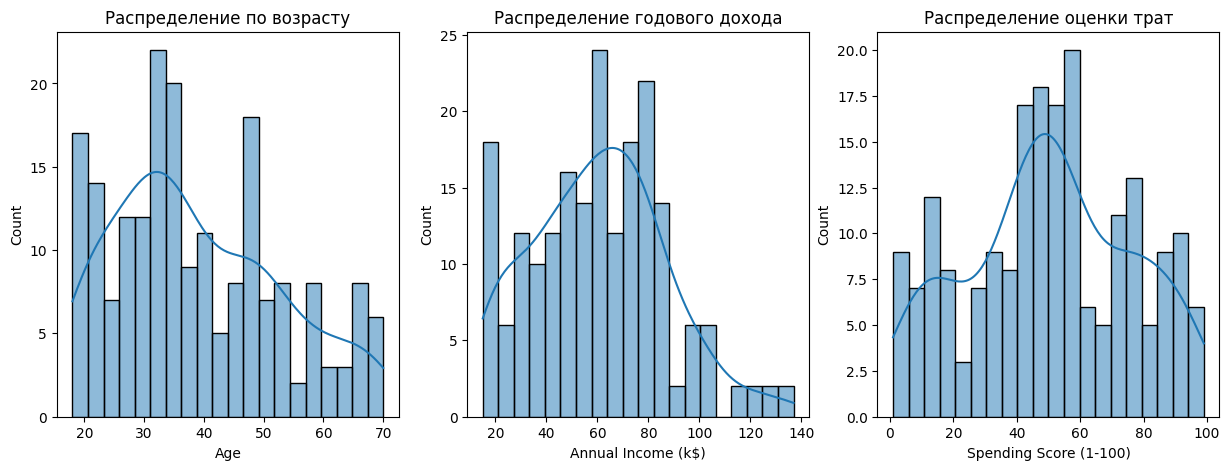

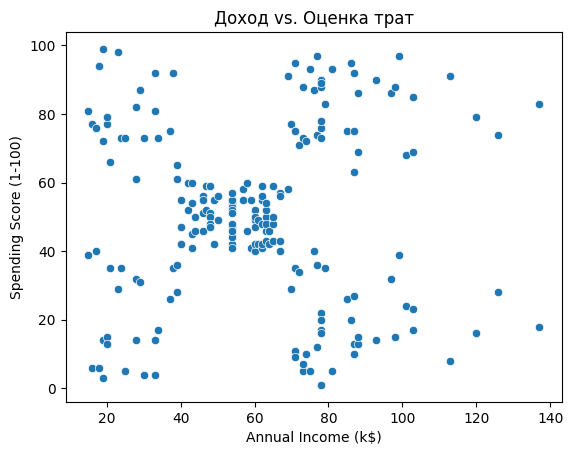

In [94]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Распределение по возрасту')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Распределение годового дохода')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Распределение оценки трат')

plt.show()

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Доход vs. Оценка трат')
plt.show()

In [95]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<function matplotlib.pyplot.show(close=None, block=None)>

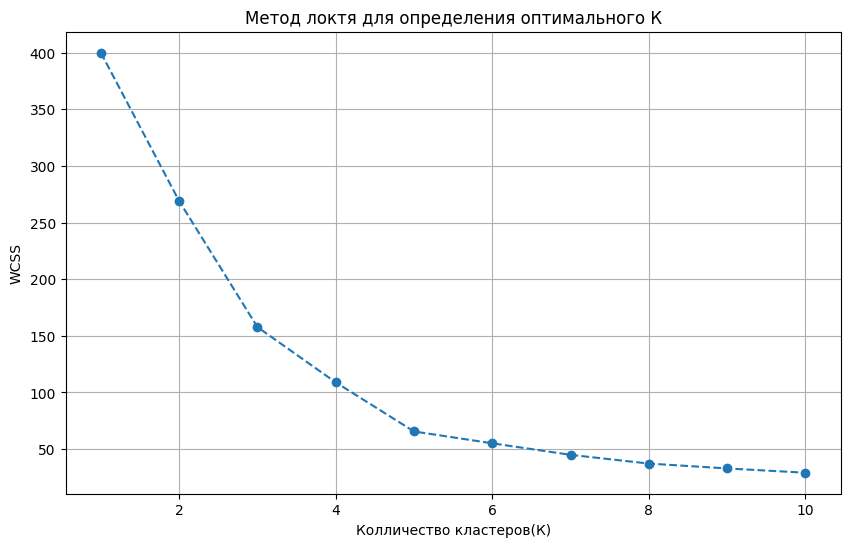

In [100]:
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1337, n_init = 10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle = '--')
plt.title('Метод локтя для определения оптимального К')
plt.xlabel('Колличество кластеров(К)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show

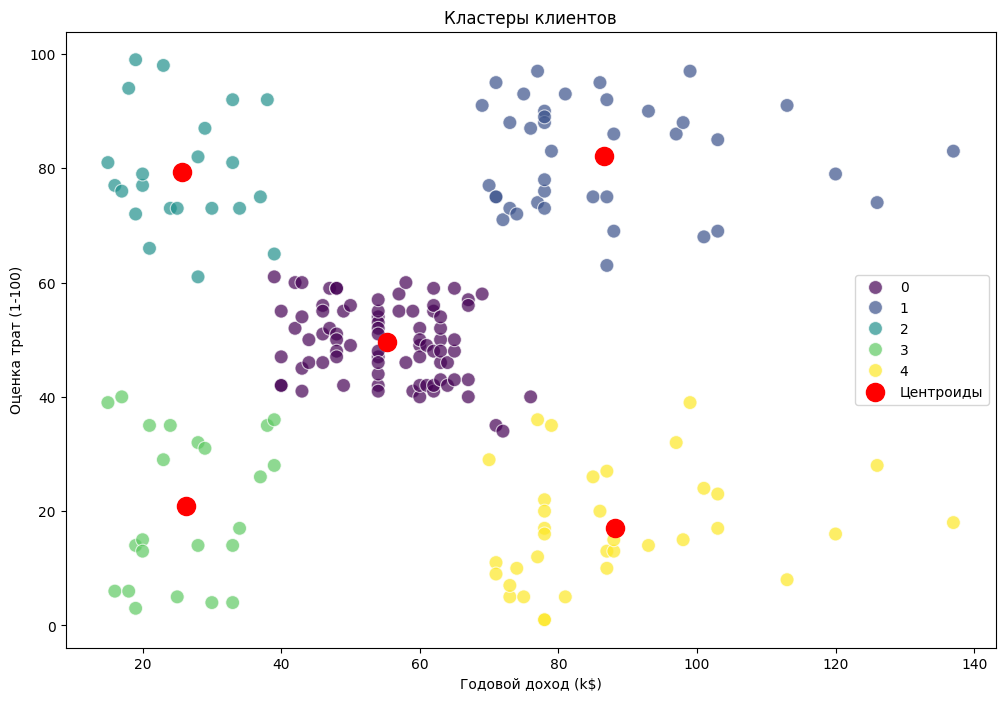

In [109]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state = 1337, n_init = 10)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], s=170, c='red', marker='o', label='Центроиды')
plt.title('Кластеры клиентов')
plt.xlabel('Годовой доход (k$)')
plt.ylabel('Оценка трат (1-100)')
plt.legend()
plt.show()

In [112]:
cluster_analysis = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().sort_values(by='Annual Income (k$)')

print("Средние значения для каждого кластера:")
print(cluster_analysis)

Средние значения для каждого кластера:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
2                 25.727273               79.363636
3                 26.304348               20.913043
0                 55.296296               49.518519
1                 86.538462               82.128205
4                 88.200000               17.114286


Genre    Female  Male
Cluster              
0          21.0  15.0
1          73.0   0.0
2           0.0  51.0
3           0.0  22.0
4          18.0   0.0


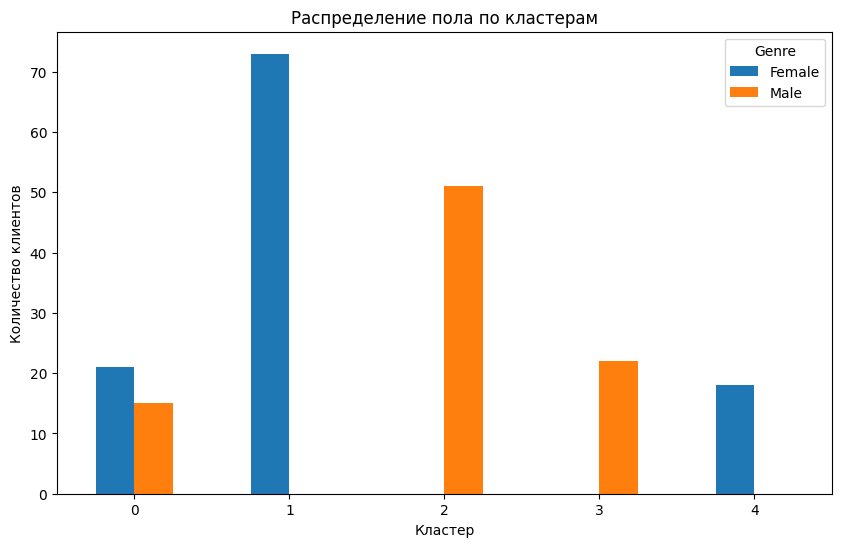


Средний возраст по кластерам и полу:
Genre       Female       Male
Cluster                      
0        32.190476  32.666667
1        38.986301   0.000000
2         0.000000  41.372549
3         0.000000  41.045455
4        41.388889   0.000000


In [121]:
gender_distribution = df.groupby('Cluster')['Genre'].value_counts().unstack().fillna(0)
print(gender_distribution)


gender_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Распределение пола по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.show()


cluster_gender_age = df.groupby(['Cluster', 'Genre'])['Age'].mean().unstack().fillna(0)
print("\nСредний возраст по кластерам и полу:")
print(cluster_gender_age)